In [2]:
import numpy as np
import matplotlib.pyplot as plt
from vpython import sphere, color, vector, arrow, canvas, cylinder
import random
import scipy.stats as stats

%matplotlib notebook

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
def generatePosition():
    """
    """
    
    r = 15000 #Size of radius
    phi = np.radians(90*np.random.random_sample()) #Phi angle between x-y plane and z
    theta = np.radians(360*np.random.random_sample()) #Theta angle between x and y
    x = r*np.sin(phi)*np.cos(theta)
    y = r*np.sin(phi)*np.sin(theta)
    z = abs(r*np.cos(phi)) #Abs to ensure hemisphere (only positive z)
    loc = [x,y,z] #Location of muon
    distance = np.sqrt((x**2)+(y**2)+(z**2))
    return phi

def generateDirection():
    """
    """
    
    alpha = random.uniform(-0.075,0.075)
    loc = generatePosition()
    beta = loc[0]


Mean ratio: 0.5244483671776864 
Standard Deviation: 0.010973307260876622 
Error: 0.0004907412194662429


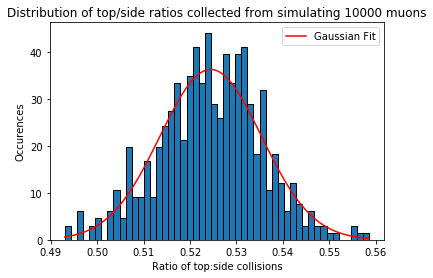

In [3]:
#PMT data
radius = 0.075
height = 0.125

#Maximum angle elevated above x-y plane to hit side
alpha = np.arctan(height/radius)

numSteps = 500

ratioArray = []

for j in range(numSteps):
    
    positions = []
    for i in range(10000):
        positions.append(generatePosition())

    top = 0
    side = 0
    for i in positions:
        if i > alpha:
            top += 1
        else:
            side += 1
    
    ratioArray.append(top/side)
    
gx = np.linspace(np.max(ratioArray),np.min(ratioArray),numSteps)    #Range over which Gaussian is fitted
x0, sigma = stats.norm.fit(ratioArray)                                  #Mean and stdev for Gaussian
gaussian = stats.norm.pdf(gx,x0,sigma)                           #Gaussian curve

plt.figure()
# 15 bins, normalized:
plt.hist(ratioArray,bins=int(numSteps/10),density=True,edgecolor='k')                 #Plot histogram
plt.plot(gx,gaussian,'r-', label="Gaussian Fit")                 #Plot Gaussian fit
plt.title("Distribution of top/side ratios collected from simulating 10000 muons")
plt.xlabel("Ratio of top:side collisions")
plt.ylabel("Occurences") 
plt.legend(loc="best");

print("\nMean ratio:", x0, "\nStandard Deviation:", sigma, "\nError:", sigma/np.sqrt(numSteps))